#### plot SAC scores

Comparison of different SAC hyperparameters

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_data(dir_name):
    # dir_name = "SAC-hyper-eval_callback/SAC_steps_100000_lr_0.001_gamma_0.995_tau_0.0025_ent_coef_auto"
    filename = dir_name + "/evaluations.npz"
    
    eval_results = np.load(filename) 
    rewards = eval_results['results'][:, 0]  
    lengths = eval_results['results'][:, 1]
    timesteps = eval_results['timesteps']

    return rewards, lengths, timesteps

In [3]:
model1 = "SAC-hyper-eval_callback/SAC_steps_100000_lr_0.001_gamma_0.995_tau_0.0025_ent_coef_auto"
rewards1, _, timesteps = get_data(model1)

model2 = "SAC-hyper-eval_callback/SAC_steps_100000_lr_0.0001_gamma_0.95_tau_0.01_ent_coef_1"
rewards2, _, _ = get_data(model2)

model3 = "SAC-hyper-eval_callback/SAC_steps_100000_lr_0.0001_gamma_0.95_tau_0.005_ent_coef_auto"
rewards3, _, _ = get_data(model3)

model4 = "SAC-hyper-eval_callback/SAC_steps_100000_lr_0.0003_gamma_0.995_tau_0.0025_ent_coef_auto"
rewards4, _, _ = get_data(model4)

# best model
model5 = "SAC-hyper-eval_callback/SAC_steps_100000_lr_0.001_gamma_0.995_tau_0.01_ent_coef_auto"
rewards5, _, _ = get_data(model5)

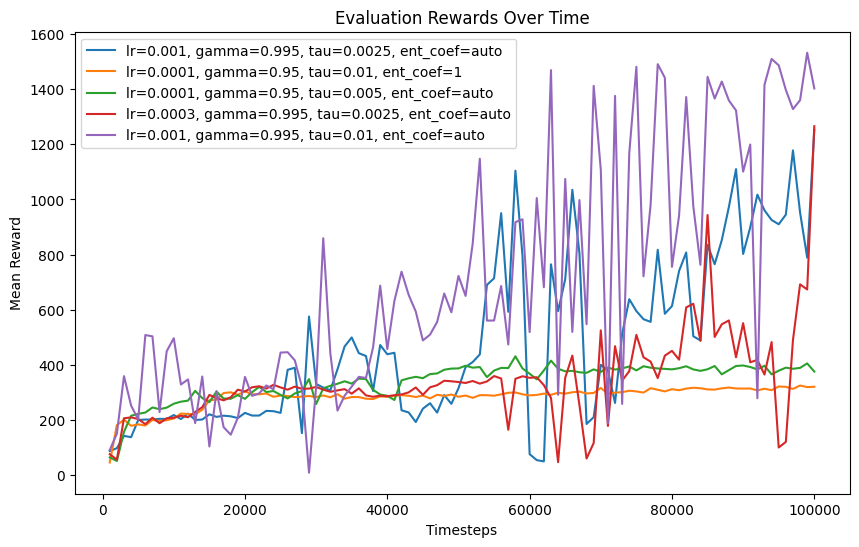

In [4]:
plt.figure(figsize=(10, 6))

plt.plot(timesteps, rewards1, label='lr=0.001, gamma=0.995, tau=0.0025, ent_coef=auto')
plt.plot(timesteps, rewards2, label='lr=0.0001, gamma=0.95, tau=0.01, ent_coef=1')
plt.plot(timesteps, rewards3, label='lr=0.0001, gamma=0.95, tau=0.005, ent_coef=auto')
plt.plot(timesteps, rewards4, label='lr=0.0003, gamma=0.995, tau=0.0025, ent_coef=auto')
plt.plot(timesteps, rewards5, label='lr=0.001, gamma=0.995, tau=0.01, ent_coef=auto')

plt.xlabel('Timesteps')
plt.ylabel('Mean Reward')
plt.title('Evaluation Rewards Over Time')

# add legend
plt.legend()
plt.show()

Text(0.5, 1.0, 'Evaluation Rewards Over Time')

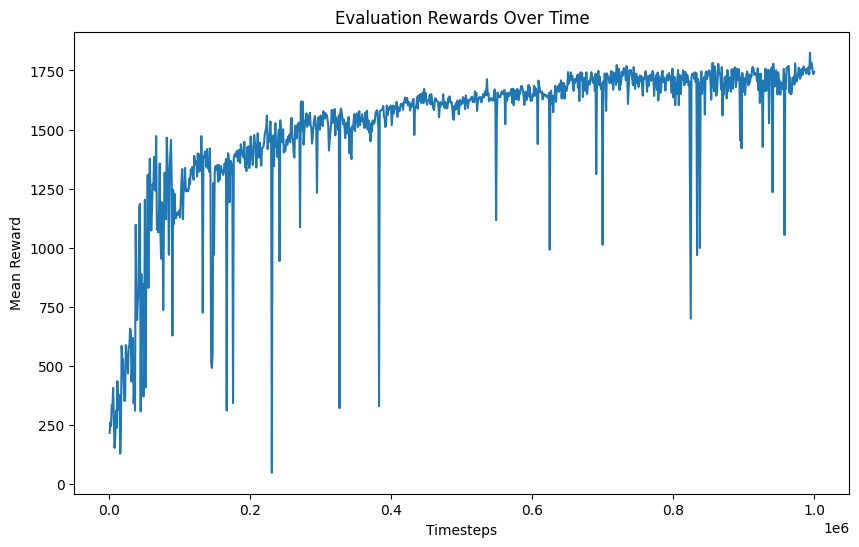

In [5]:
# now plot the 1M model with the best hyperparameters

model6 = "SAC-hyper-eval_callback/SAC_steps_1000000_lr_0.001_gamma_0.995_tau_0.01_ent_coef_auto"

rewards6, _, timesteps = get_data(model6)

plt.figure(figsize=(10, 6))

plt.plot(timesteps, rewards6, label='lr=0.001, gamma=0.995, tau=0.01, ent_coef=auto')

plt.xlabel('Timesteps')
plt.ylabel('Mean Reward')
plt.title('Evaluation Rewards Over Time')



This model performs well in the source environment, now let's make a comparison between the source and target environments.


In [6]:
from env.custom_hopper import *
import gym
from mujoco_py import GlfwContext
import glfw
from stable_baselines3 import SAC

In [7]:
source_env = gym.make('CustomHopper-source-v0')
target_env = gym.make('CustomHopper-target-v0')

model = SAC.load(model6 + "/best_model.zip")

In [23]:
def get_reward(env, model, n_episodes, seed, verbose = True):
    reward_list = np.array([])

    for i in range(n_episodes):
        done = False
        env.seed(seed + i)
        state = env.reset()
        total_reward = 0
        step_count = 0

        while not done:
            action, _ = model.predict(state, deterministic=True)

            state, reward, done, _ = env.step(action)
            total_reward += reward
            step_count += 1

        if verbose:
            print(f"Episode {i} reward: {total_reward} in total {step_count} steps")

        reward_list = np.append(reward_list, total_reward)

    return (reward_list)

In [24]:
n_episodes = 50
seed = 1234

In [25]:
rewards_list_source = get_reward(source_env, model, n_episodes, seed)

rewards_list_target = get_reward(target_env, model, n_episodes, seed)

Episode 0 reward: 1781.9478135792558 in total 500 steps
Episode 1 reward: 1780.2969346486295 in total 500 steps
Episode 2 reward: 1791.2636629644537 in total 500 steps
Episode 3 reward: 1773.5670059450356 in total 500 steps
Episode 4 reward: 1774.0276487043404 in total 500 steps
Episode 5 reward: 1791.7626537212425 in total 500 steps
Episode 6 reward: 1779.6766214766058 in total 500 steps
Episode 7 reward: 1771.0222669686707 in total 500 steps
Episode 8 reward: 1777.1211509834282 in total 500 steps
Episode 9 reward: 1794.384522541707 in total 500 steps
Episode 10 reward: 1793.40090612902 in total 500 steps
Episode 11 reward: 1766.50861126088 in total 500 steps
Episode 12 reward: 1792.2605980091562 in total 500 steps
Episode 13 reward: 1793.4228324110115 in total 500 steps
Episode 14 reward: 1778.4291381395099 in total 500 steps
Episode 15 reward: 1777.8289562162427 in total 500 steps
Episode 16 reward: 1777.8067945005384 in total 500 steps
Episode 17 reward: 1775.9580524036458 in total

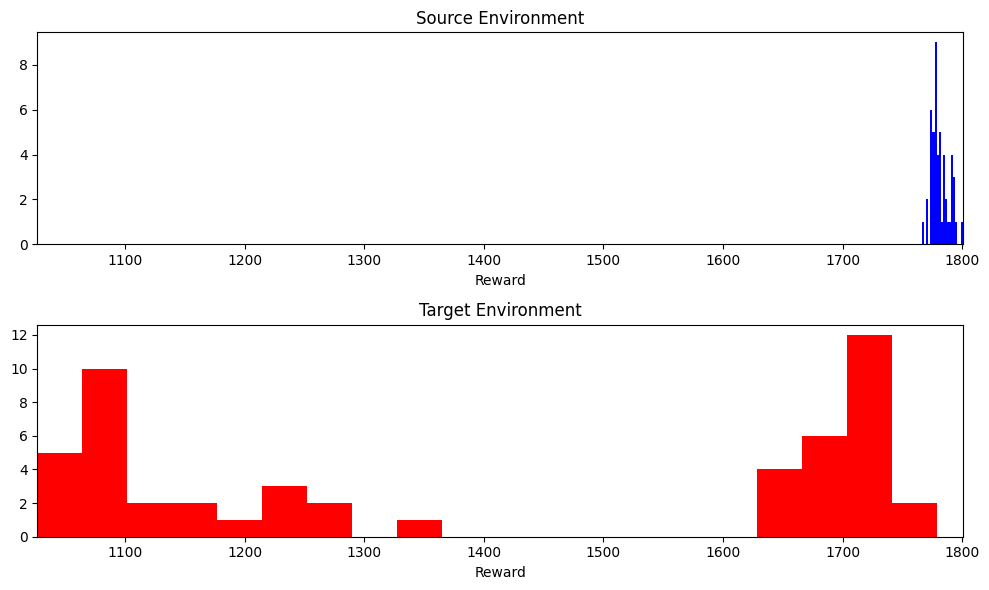

In [26]:
# plot two different histograms in subplots with two rows and fixed scale for rewards (i.e x axis)

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.hist(rewards_list_source, bins=20, color='blue')
plt.title('Source Environment')
plt.xlabel('Reward')
plt.xlim(min(rewards_list_source.min(), rewards_list_target.min()), max(rewards_list_source.max(), rewards_list_target.max()))

plt.subplot(2, 1, 2)
plt.hist(rewards_list_target, bins=20, color='red')
plt.title('Target Environment')
plt.xlabel('Reward')
plt.xlim(min(rewards_list_source.min(), rewards_list_target.min()), max(rewards_list_source.max(), rewards_list_target.max()))


plt.tight_layout()

plt.show()



In [27]:
print("Source Environment: Mean Reward: ", round(rewards_list_source.mean()), "Std Dev: ", round(rewards_list_source.std()))
print("Target Environment: Mean Reward: ", round(rewards_list_target.mean()), "Std Dev: ", round(rewards_list_target.std()))


Source Environment: Mean Reward:  1781 Std Dev:  7
Target Environment: Mean Reward:  1404 Std Dev:  297


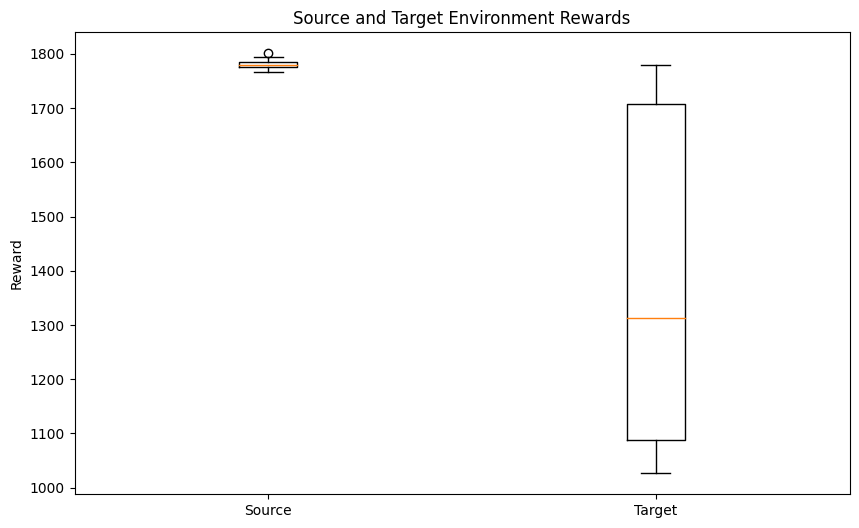

In [28]:
# plot boxplot for the two environments

plt.figure(figsize=(10, 6))

plt.boxplot([rewards_list_source, rewards_list_target], labels=['Source', 'Target'])
plt.title('Source and Target Environment Rewards')
plt.ylabel('Reward')

plt.show()
